# 8 - Data visualization & clustering

---

In this notebook, we will continue to explore the techniques for data visualization and focus on clustering algorithms and techniques for evaluating them.

The dataset used in this notebook is the same that was used in the third session.
In case you do not remember the details: the dataset contains a list of transactions from an online retailer: for each transaction, we have several attributes, as well as a label indicating whether a transaction was fraudulent or not.

#### Import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler

#### Define the filename for the training data

In [2]:
FILENAME = 'payment_fraud.csv'

#### Read the file

In [3]:
df = pd.read_csv(FILENAME)

<div class="alert alert-block alert-danger">
<b>Q: we often had to define in advance the column names. However, this time we didn't have to. Why?</b>
</div>

<div class="alert alert-block alert-success">
Because they are saved in the first line of the file.
</div>

---

<div class="alert alert-block alert-danger">
<b>Q: Display 10 random rows of the dataframe.</b>
</div>

In [4]:
df.sample(10)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
1380,4,1,4.745402,creditcard,0.000000,0
14192,2000,1,4.965339,creditcard,0.968750,0
10040,229,2,3.483951,creditcard,0.013889,0
17012,434,1,4.748314,creditcard,0.000000,0
31288,77,1,4.965339,paypal,0.002083,0
29270,2000,1,4.742303,creditcard,0.525694,0
318,2,1,4.965339,paypal,0.002778,0
16551,220,1,4.748314,creditcard,3.784722,0
3150,141,1,4.921318,paypal,0.000000,0
18828,8,1,3.954522,creditcard,0.000000,0


---

<div class="alert alert-block alert-danger">
<b>Q: Show the columns of the dataframe</b>
</div>

In [5]:
print(df.columns)

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'label'],
      dtype='object')


---

<div class="alert alert-block alert-danger">
<b>Q: Print the number of rows of the dataframe</b>
</div>

In [6]:
print(len(df.index))

39221


---

<div class="alert alert-block alert-danger">
<b>Q: Print the number of columns of the dataframe</b>
</div>

In [7]:
print(df.shape[1])

6


---

<div class="alert alert-block alert-danger">
<b>Q: Show the type of each feature.</b>
</div>

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
accountAgeDays          39221 non-null int64
numItems                39221 non-null int64
localTime               39221 non-null float64
paymentMethod           39221 non-null object
paymentMethodAgeDays    39221 non-null float64
label                   39221 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB
None


---

<div class="alert alert-block alert-danger">
<b>Q: Display the number of occurrences of each value of 'paymentMethod'.</b>
</div>

In [9]:
df.groupby('paymentMethod').size().reset_index()

,paymentMethod,0
0,creditcard,28004
1,paypal,9303
2,storecredit,1914


---

## Data visualization

<div class="alert alert-block alert-danger">
<b>Q: Plot the distribution of 'accountAgeDays'.</b>
</div>

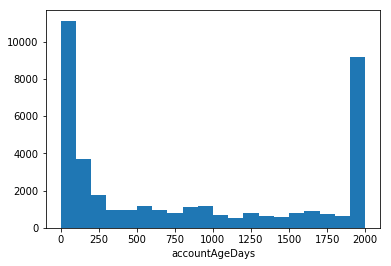

In [10]:
fig, ax = plt.subplots()
ax.hist(df['accountAgeDays'].values, bins=20)
ax.set_xlabel('accountAgeDays')
plt.show()

---

<div class="alert alert-block alert-danger">
<b>Q: Plot the distribution of 'localTime'.</b>
</div>

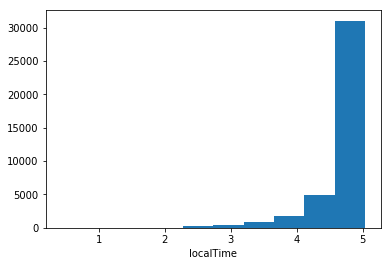

In [11]:
fig, ax = plt.subplots()
ax.hist(df['localTime'].values, bins=10)
ax.set_xlabel('localTime')
plt.show()

---

<div class="alert alert-block alert-danger">
<b>Q: Plot the distribution of 'paymentMethodAgeDays'.</b>
</div>

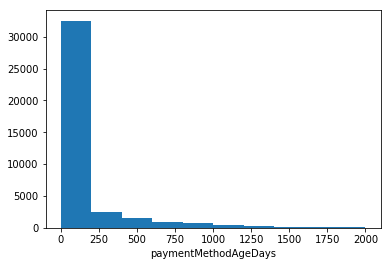

In [12]:
fig, ax = plt.subplots()
ax.hist(df['paymentMethodAgeDays'].values, bins=10)
ax.set_xlabel('paymentMethodAgeDays')
plt.show()

---

<div class="alert alert-block alert-danger">
<b>Q: Plot the same three distributions as above but separately for the fraudulent and not fraudulent transactions.</b>
</div>

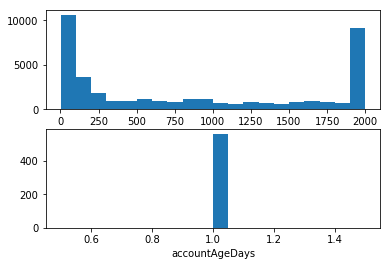

In [13]:
fig, ax = plt.subplots(2,1)
ax[0].hist(df[df['label']==0]['accountAgeDays'].values, bins=20)
ax[1].hist(df[df['label']==1]['accountAgeDays'].values, bins=20)
ax[1].set_xlabel('accountAgeDays')
plt.show()

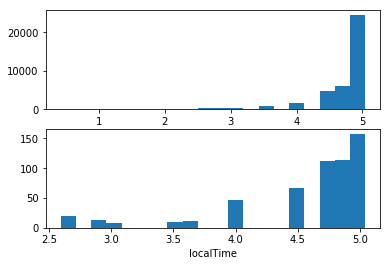

In [14]:
fig, ax = plt.subplots(2,1)
ax[0].hist(df[df['label']==0]['localTime'].values, bins=20)
ax[1].hist(df[df['label']==1]['localTime'].values, bins=20)
ax[1].set_xlabel('localTime')
plt.show()

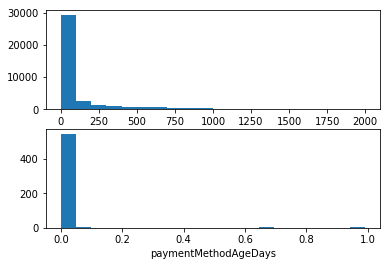

In [15]:
fig, ax = plt.subplots(2,1)
ax[0].hist(df[df['label']==0]['paymentMethodAgeDays'].values, bins=20)
ax[1].hist(df[df['label']==1]['paymentMethodAgeDays'].values, bins=20)
ax[1].set_xlabel('paymentMethodAgeDays')
plt.show()

---

<div class="alert alert-block alert-danger">
<b>Q: Plot 'paymentMethodAgeDays' versus 'accountAgeDays'. Can you see a relationship between them? If so, what is it? Also, try to do the same thing separating fraudulent and not fraudulent entries (e.g. by plotting them in different colors).</b>
</div>

In [16]:
x = df['paymentMethodAgeDays'].values
y = df['accountAgeDays'].values
colors = ['green' if x==0 else 'red' for x in df['label'].values]

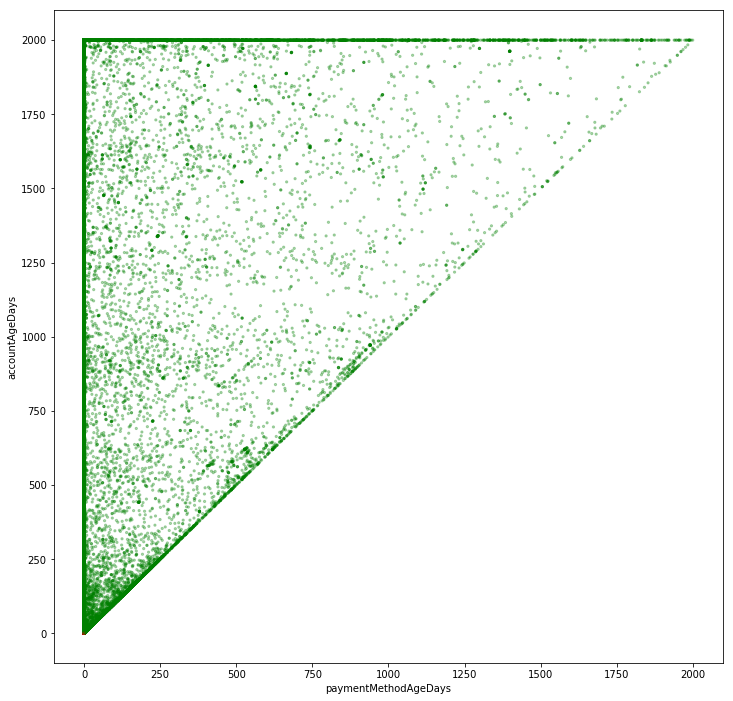

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(x, y, s=5, alpha=0.3, c=colors)
ax.set_xlabel('paymentMethodAgeDays')
ax.set_ylabel('accountAgeDays')
plt.show()

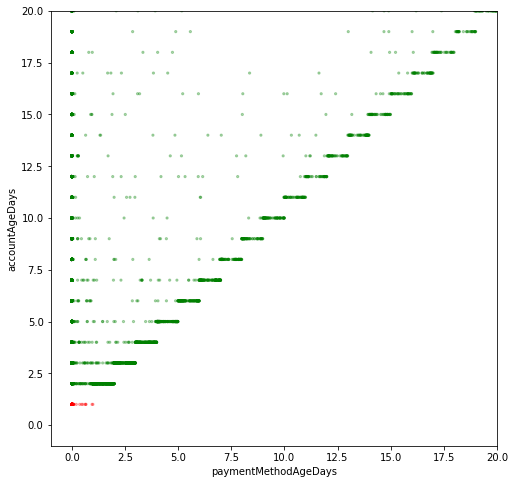

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, s=5, alpha=0.3, c=colors)
ax.set_xlim(-1, 20)
ax.set_ylim(-1, 20)
ax.set_xlabel('paymentMethodAgeDays')
ax.set_ylabel('accountAgeDays')
plt.show()

---

<div class="alert alert-block alert-danger">
<b>Q: The plots above suggest the reason why this was a very easy dataset (if you remember, we got 100% accuracy on it!). What is such reason?</b>
</div>

<div class="alert alert-block alert-success">
It looks like all the malicious transactions have accountAgeDays = 1
</div>

---

<div class="alert alert-block alert-danger">
<b>Q: Try to look for any correlations between 'paymentMethodAgeDays' and 'numItems'. Do that separating fraudulent and not fraudulent entries as well (e.g. by plotting them in different colors).</b>
</div>

In [19]:
x = df['paymentMethodAgeDays'].values
y = df['numItems'].values
colors = ['green' if x==0 else 'red' for x in df['label'].values]

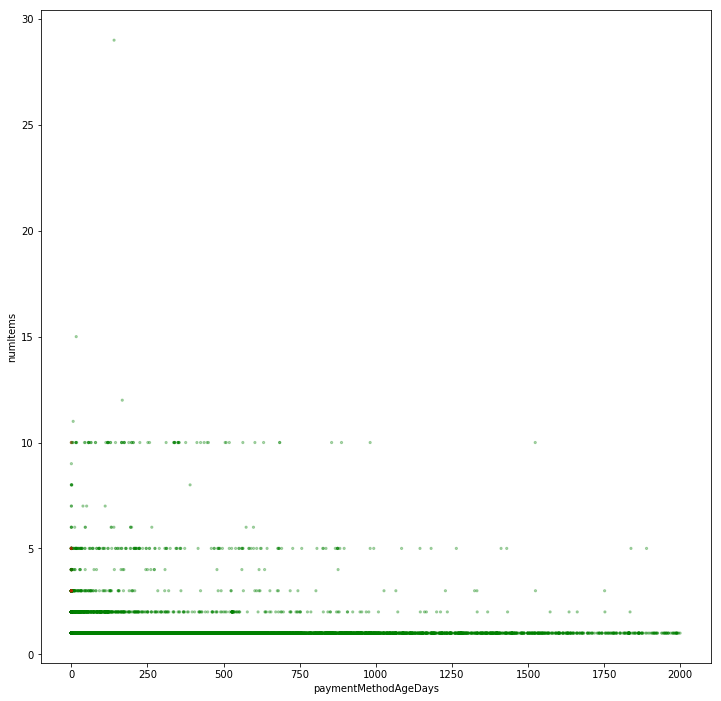

In [20]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(x, y, s=5, alpha=0.3, c=colors)
ax.set_xlabel('paymentMethodAgeDays')
ax.set_ylabel('numItems')
plt.show()

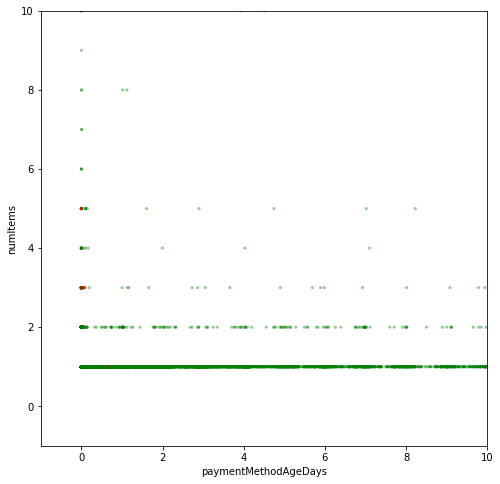

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, s=5, alpha=0.3, c=colors)
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)
ax.set_xlabel('paymentMethodAgeDays')
ax.set_ylabel('numItems')
plt.show()

---

<div class="alert alert-block alert-danger">
<b>Q: Display with a bar plot the number of transactions for each 'paymentMethod'</b>
</div>

In [22]:
groupedby_df = df.groupby('paymentMethod').size().reset_index()
service_list = groupedby_df['paymentMethod'].values
count_list = groupedby_df[0].values

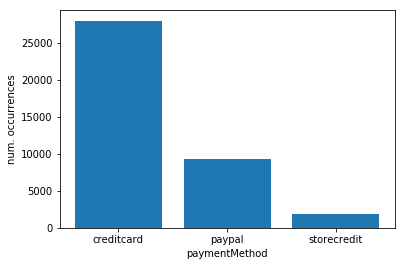

In [23]:
fig, ax = plt.subplots()
ax.bar(service_list, count_list)
ax.set_xlabel('paymentMethod')
ax.set_ylabel('num. occurrences')
plt.show()

---

## Data preparation for clustering

<div class="alert alert-block alert-danger">
<b>Q: Create a new dataframe performing one hot encoding on the feature(s) that require so.</b>
</div>

In [24]:
df_one_hot = pd.get_dummies(df, columns=['paymentMethod'])

<div class="alert alert-block alert-danger">
<b>Q: Complete the cell below in order to perform scaling.</b>
</div>

In [25]:
numeric_cols = ['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays']

standard_scaler = StandardScaler().fit(df[numeric_cols])
df[numeric_cols] = standard_scaler.transform(df[numeric_cols])

/home/luca/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/luca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


---

# Clustering

Documentation:
- [kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
- [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)
- [hierarchical clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

---

#### Import the classes for clustering

In [26]:
from sklearn.cluster import (
    KMeans, 
    AgglomerativeClustering, 
    DBSCAN
)

---

### Let's start with KMeans

You can perform fit similarly to how you perform it for regression and classification.

In [27]:
kmeans = KMeans(n_clusters=3).fit(df_one_hot.drop(['label'], axis=1))

You can print the coordinates of the center of each cluster 

In [28]:
kmeans.cluster_centers_

array([[1.13239252e+02, 1.09993535e+00, 4.75113082e+00, 3.05402744e+01,
        7.09998923e-01, 2.38713501e-01, 5.12875768e-02],
       [1.89913932e+03, 1.05413839e+00, 4.73746808e+00, 2.44042307e+02,
        7.15266401e-01, 2.36133864e-01, 4.85997348e-02],
       [9.16773342e+02, 1.09885204e+00, 4.75896684e+00, 1.42200071e+02,
        7.21428571e-01, 2.35331633e-01, 4.32397959e-02]])

If you want, you can print the labels for the elements in DF

In [29]:
kmeans.labels_

array([0, 2, 2, ..., 1, 0, 0], dtype=int32)

Let's save those labels in a new column of the dataframe

In [30]:
df_one_hot['cluster'] = kmeans.labels_

You can have an intuition of how well the clustering algorithm performed by looking at the distribution of the elements across the two clusters:

In [31]:
df_one_hot.groupby(['label', 'cluster']).size()

label  cluster
0      0          18009
       1          12818
       2           7834
1      0            560
dtype: int64

---

### Evaluating the clustering algorithms

There are many possible metrics for clustering evaluation: some can be used when the ground truth labels are known, some can be used when the true labels are unknown.

If the ground truth is known, you can use, for instance:
- [homogeneity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score)
- [completeness](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score)
- [v-measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score)

If the ground truth is not known, you can use, for instance:
- [silhouette](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) - "a higher Silhouette Coefficient score relates to a model with better defined clusters"
- [Davies-Bouldin Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score) - "a lower Davies-Bouldin index relates to a model with better separation between the clusters"

---

#### Import the metrics

In [32]:
from sklearn.metrics import (
    homogeneity_score,
    completeness_score,
    v_measure_score,
    silhouette_score,
    davies_bouldin_score,
)

<div class="alert alert-block alert-danger">
<b>Q: In the cell above, I have imported the metrics. Following the given examples, try to compute the other metrics for the clusters computed above with k-means.</b>
</div>

Remember to keep separeted:
- the predicted labels
- the column 'label' containing the ground truth (be careful not to consider it as a feature while testing!!)
- the features.

In [33]:
predicted_clusters = df_one_hot['cluster'].values
true_labels = df_one_hot['label'].values

In [34]:
print(homogeneity_score(true_labels, predicted_clusters))
print(completeness_score(true_labels, predicted_clusters))
print(v_measure_score(true_labels, predicted_clusters))

0.1441813967601043
0.010363754683463981
0.01933752837903212


In [35]:
print(silhouette_score(df_one_hot.drop(['label', 'cluster'], axis=1), kmeans.labels_))
print(davies_bouldin_score(df_one_hot.drop(['label', 'cluster'], axis=1), kmeans.labels_))

0.6409751177942472
0.6357192141398932


/home/luca/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


---

<div class="alert alert-block alert-danger">
<b>Q: After that, perform k-means clustering for k=4, compute the same metrics and compare the results. Which one performed better?</b>
</div>

Remember: better metrics doesn't always mean better clustering.

In [36]:
kmeans = KMeans(n_clusters=4).fit(df_one_hot.drop(['label'], axis=1))
df_one_hot['cluster'] = kmeans.labels_

In [37]:
predicted_clusters = df_one_hot['cluster'].values
true_labels = df_one_hot['label'].values

In [38]:
print(homogeneity_score(true_labels, predicted_clusters))
print(completeness_score(true_labels, predicted_clusters))
print(v_measure_score(true_labels, predicted_clusters))

0.1457841749581523
0.009084224208716086
0.01710272900768602


In [39]:
print(silhouette_score(df_one_hot.drop(['label', 'cluster'], axis=1), kmeans.labels_))
print(davies_bouldin_score(df_one_hot.drop(['label', 'cluster'], axis=1), kmeans.labels_))

0.6651021362960804
0.5786912468871854


/home/luca/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


---

## Let's have a look at the elbow method in action

In [44]:
silhouette_values = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k).fit(df_one_hot.drop(['label'], axis=1))
    silhouette_values.append(silhouette_score(df_one_hot.drop(['label'], axis=1), kmeans.labels_))

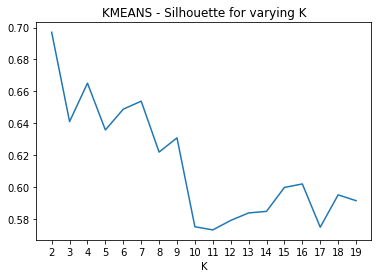

In [45]:
fig, ax = plt.subplots()
ax.plot(range(2, 20), silhouette_values)
ax.set_xticks(range(2, 20))
ax.set_title('KMEANS - Silhouette for varying K')
ax.set_xlabel('K')
plt.show()

---

<div class="alert alert-block alert-danger">
<b>Q: Now compute and plot the value of the v_measure_score for different K</b>
</div>

In [47]:
v_measure_values = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k).fit(df_one_hot.drop(['label'], axis=1))
    v_measure_values.append(v_measure_score(df_one_hot['label'].values, kmeans.labels_))

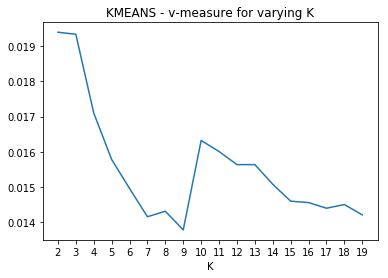

In [48]:
fig, ax = plt.subplots()
ax.plot(range(2, 20), v_measure_values)
ax.set_xticks(range(2, 20))
ax.set_title('KMEANS - v-measure for varying K')
ax.set_xlabel('K')
plt.show()

---

<div class="alert alert-block alert-danger">
<b>Q: Now try to see how the v-measure depends on K for hierarchical clustering.</b>
</div>

In [ ]:
v_measure_values = []
for k in range(2, 10):
    agglomerative = AgglomerativeClustering(n_clusters=k).fit(df_one_hot.drop(['label'], axis=1))
    v_measure_values.append(v_measure_score(df_one_hot['label'].values, agglomerative.labels_))

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(2, 10), v_measure_values)
ax.set_xticks(range(2, 10))
ax.set_title('HIERARCHICAL CLUSTERING - v-measure for varying K')
ax.set_xlabel('K')
plt.show()

---